### Chart 2 show 5 Km Race Segment Times

In [44]:
# Try to use Seaborn/Matplotlib to replicate another cool viz from Cole Nusaumbber Knaflic's book Storytelling with Data.
# Inspiration from :
# https://github.com/adamribaudo/storytelling-with-data-ggplot
# Using code from the excellent:
# https://github.com/empathy87/storytelling-with-data

## Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import transforms
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter

from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

%matplotlib inline

In [12]:
df =   pd.read_csv ( '..\Data\Staging\chart2_data.csv')
df.head()

,Label,CHIP_TIME_MINS,Month,SECTION,time_mins
0,John,117.400000,Apr,0-5km,24.500000
1,Ellena,163.250000,Apr,0-5km,36.416667
2,John,109.066667,Oct,0-5km,23.816667
3,Ellena,134.900000,Oct,0-5km,29.833333
4,John,117.400000,Apr,5-10km,27.416667


#### Get numeric values for SECTION

In [76]:
df_lkp = pd.DataFrame  ( {'SECTION' : list (df.SECTION.unique () )  } ) \
          .reset_index () \
          .rename ( columns={'index':'SECTION_NO'} )

df = df.merge ( df_lkp, how="left")
df.head() 

,Label,CHIP_TIME_MINS,Month,SECTION,time_mins,Hue,SECTION_NO
0,John,117.400000,Apr,0-5km,24.500000,John-Apr,0
1,Ellena,163.250000,Apr,0-5km,36.416667,Ellena-Apr,0
2,John,109.066667,Oct,0-5km,23.816667,John-Oct,0
3,Ellena,134.900000,Oct,0-5km,29.833333,Ellena-Oct,0
4,John,117.400000,Apr,5-10km,27.416667,John-Apr,1


#### How to get the polygon points

In [114]:
# For John

poly_points_John = \
pd.concat ( 
[   
df.loc [  (df.Label=='John') & (df.Month == 'Apr')  , ['SECTION_NO', 'time_mins']]
,
df.loc [  (df.Label=='John') & (df.Month == 'Oct')  , ['SECTION_NO', 'time_mins']].sort_values ( 'SECTION_NO', ascending=False)
]
)

poly_points_John.head()

,SECTION_NO,time_mins
0,0,24.500000
4,1,27.416667
8,2,28.250000
12,3,30.800000
14,3,28.583333


In [116]:
# For Ellena

poly_points_Ellena = \
pd.concat ( 
[   
df.loc [  (df.Label=='Ellena') & (df.Month == 'Apr')  , ['SECTION_NO', 'time_mins']]
,
df.loc [  (df.Label=='Ellena') & (df.Month == 'Oct')  , ['SECTION_NO', 'time_mins']].sort_values ( 'SECTION_NO', ascending=False)
]
)



#### get the end of line labels 

In [181]:
for i in  list ( df.loc [ df.SECTION_NO == 3,   ].index ):
    print (df.loc[i, 'Month'] )
    
for i in  list ( df.loc [ df.SECTION_NO == 3,   ].index ):
    print (df.loc[i, 'time_mins'] )
    


Apr
Apr
Oct
Oct
30.80000000000001
41.10000000000001
28.58333333333333
34.000000000000014


#### Find the section increases 

In [247]:
# Add a column for previous section time 

#df.sort_values(['Label', 'Month', 'SECTION']).groupby(['Label', 'Month', 'SECTION'])['time_mins'].shift (1)
df['prev_section_time']  =  df.sort_values(['Label', 'Month', 'SECTION_NO']).groupby (['Label', 'Month']) ['time_mins'].shift (1).fillna(0)

df.head(6)


,Label,CHIP_TIME_MINS,Month,SECTION,time_mins,Hue,SECTION_NO,prev_section_time,section_increase
0,John,117.400000,Apr,0-5km,24.500000,John-Apr,0,0.000000,24
1,Ellena,163.250000,Apr,0-5km,36.416667,Ellena-Apr,0,0.000000,36
2,John,109.066667,Oct,0-5km,23.816667,John-Oct,0,0.000000,23
3,Ellena,134.900000,Oct,0-5km,29.833333,Ellena-Oct,0,0.000000,29
4,John,117.400000,Apr,5-10km,27.416667,John-Apr,1,24.500000,2
5,Ellena,163.250000,Apr,5-10km,37.950000,Ellena-Apr,1,36.416667,1


In [248]:
# Calculate the difference in minutes
df['section_increase'] =   df.time_mins  - df.prev_section_time 
df.head(8)


,Label,CHIP_TIME_MINS,Month,SECTION,time_mins,Hue,SECTION_NO,prev_section_time,section_increase
0,John,117.400000,Apr,0-5km,24.500000,John-Apr,0,0.000000,24.500000
1,Ellena,163.250000,Apr,0-5km,36.416667,Ellena-Apr,0,0.000000,36.416667
2,John,109.066667,Oct,0-5km,23.816667,John-Oct,0,0.000000,23.816667
3,Ellena,134.900000,Oct,0-5km,29.833333,Ellena-Oct,0,0.000000,29.833333
4,John,117.400000,Apr,5-10km,27.416667,John-Apr,1,24.500000,2.916667
5,Ellena,163.250000,Apr,5-10km,37.950000,Ellena-Apr,1,36.416667,1.533333
6,John,109.066667,Oct,5-10km,25.300000,John-Oct,1,23.816667,1.483333
7,Ellena,134.900000,Oct,5-10km,31.900000,Ellena-Oct,1,29.833333,2.066667


In [15]:
df['Hue'] = df.Label + '-' + df.Month
df.head()

,Label,CHIP_TIME_MINS,Month,SECTION,time_mins,Hue
0,John,117.400000,Apr,0-5km,24.500000,John-Apr
1,Ellena,163.250000,Apr,0-5km,36.416667,Ellena-Apr
2,John,109.066667,Oct,0-5km,23.816667,John-Oct
3,Ellena,134.900000,Oct,0-5km,29.833333,Ellena-Oct
4,John,117.400000,Apr,5-10km,27.416667,John-Apr


### Set up fonts / colours etc

In [4]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

In [5]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [6]:
# Thank you to Andrey / empathy87 on github

def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')
        

### Simplify the Data

### Build the chart

array([[0.43140231, 0.51692969],
       [0.65059185, 0.72841395],
       [0.22319381, 0.88512236],
       [0.21001631, 0.71931126],
       [0.53056754, 0.25221341],
       [0.51343505, 0.89657925]])

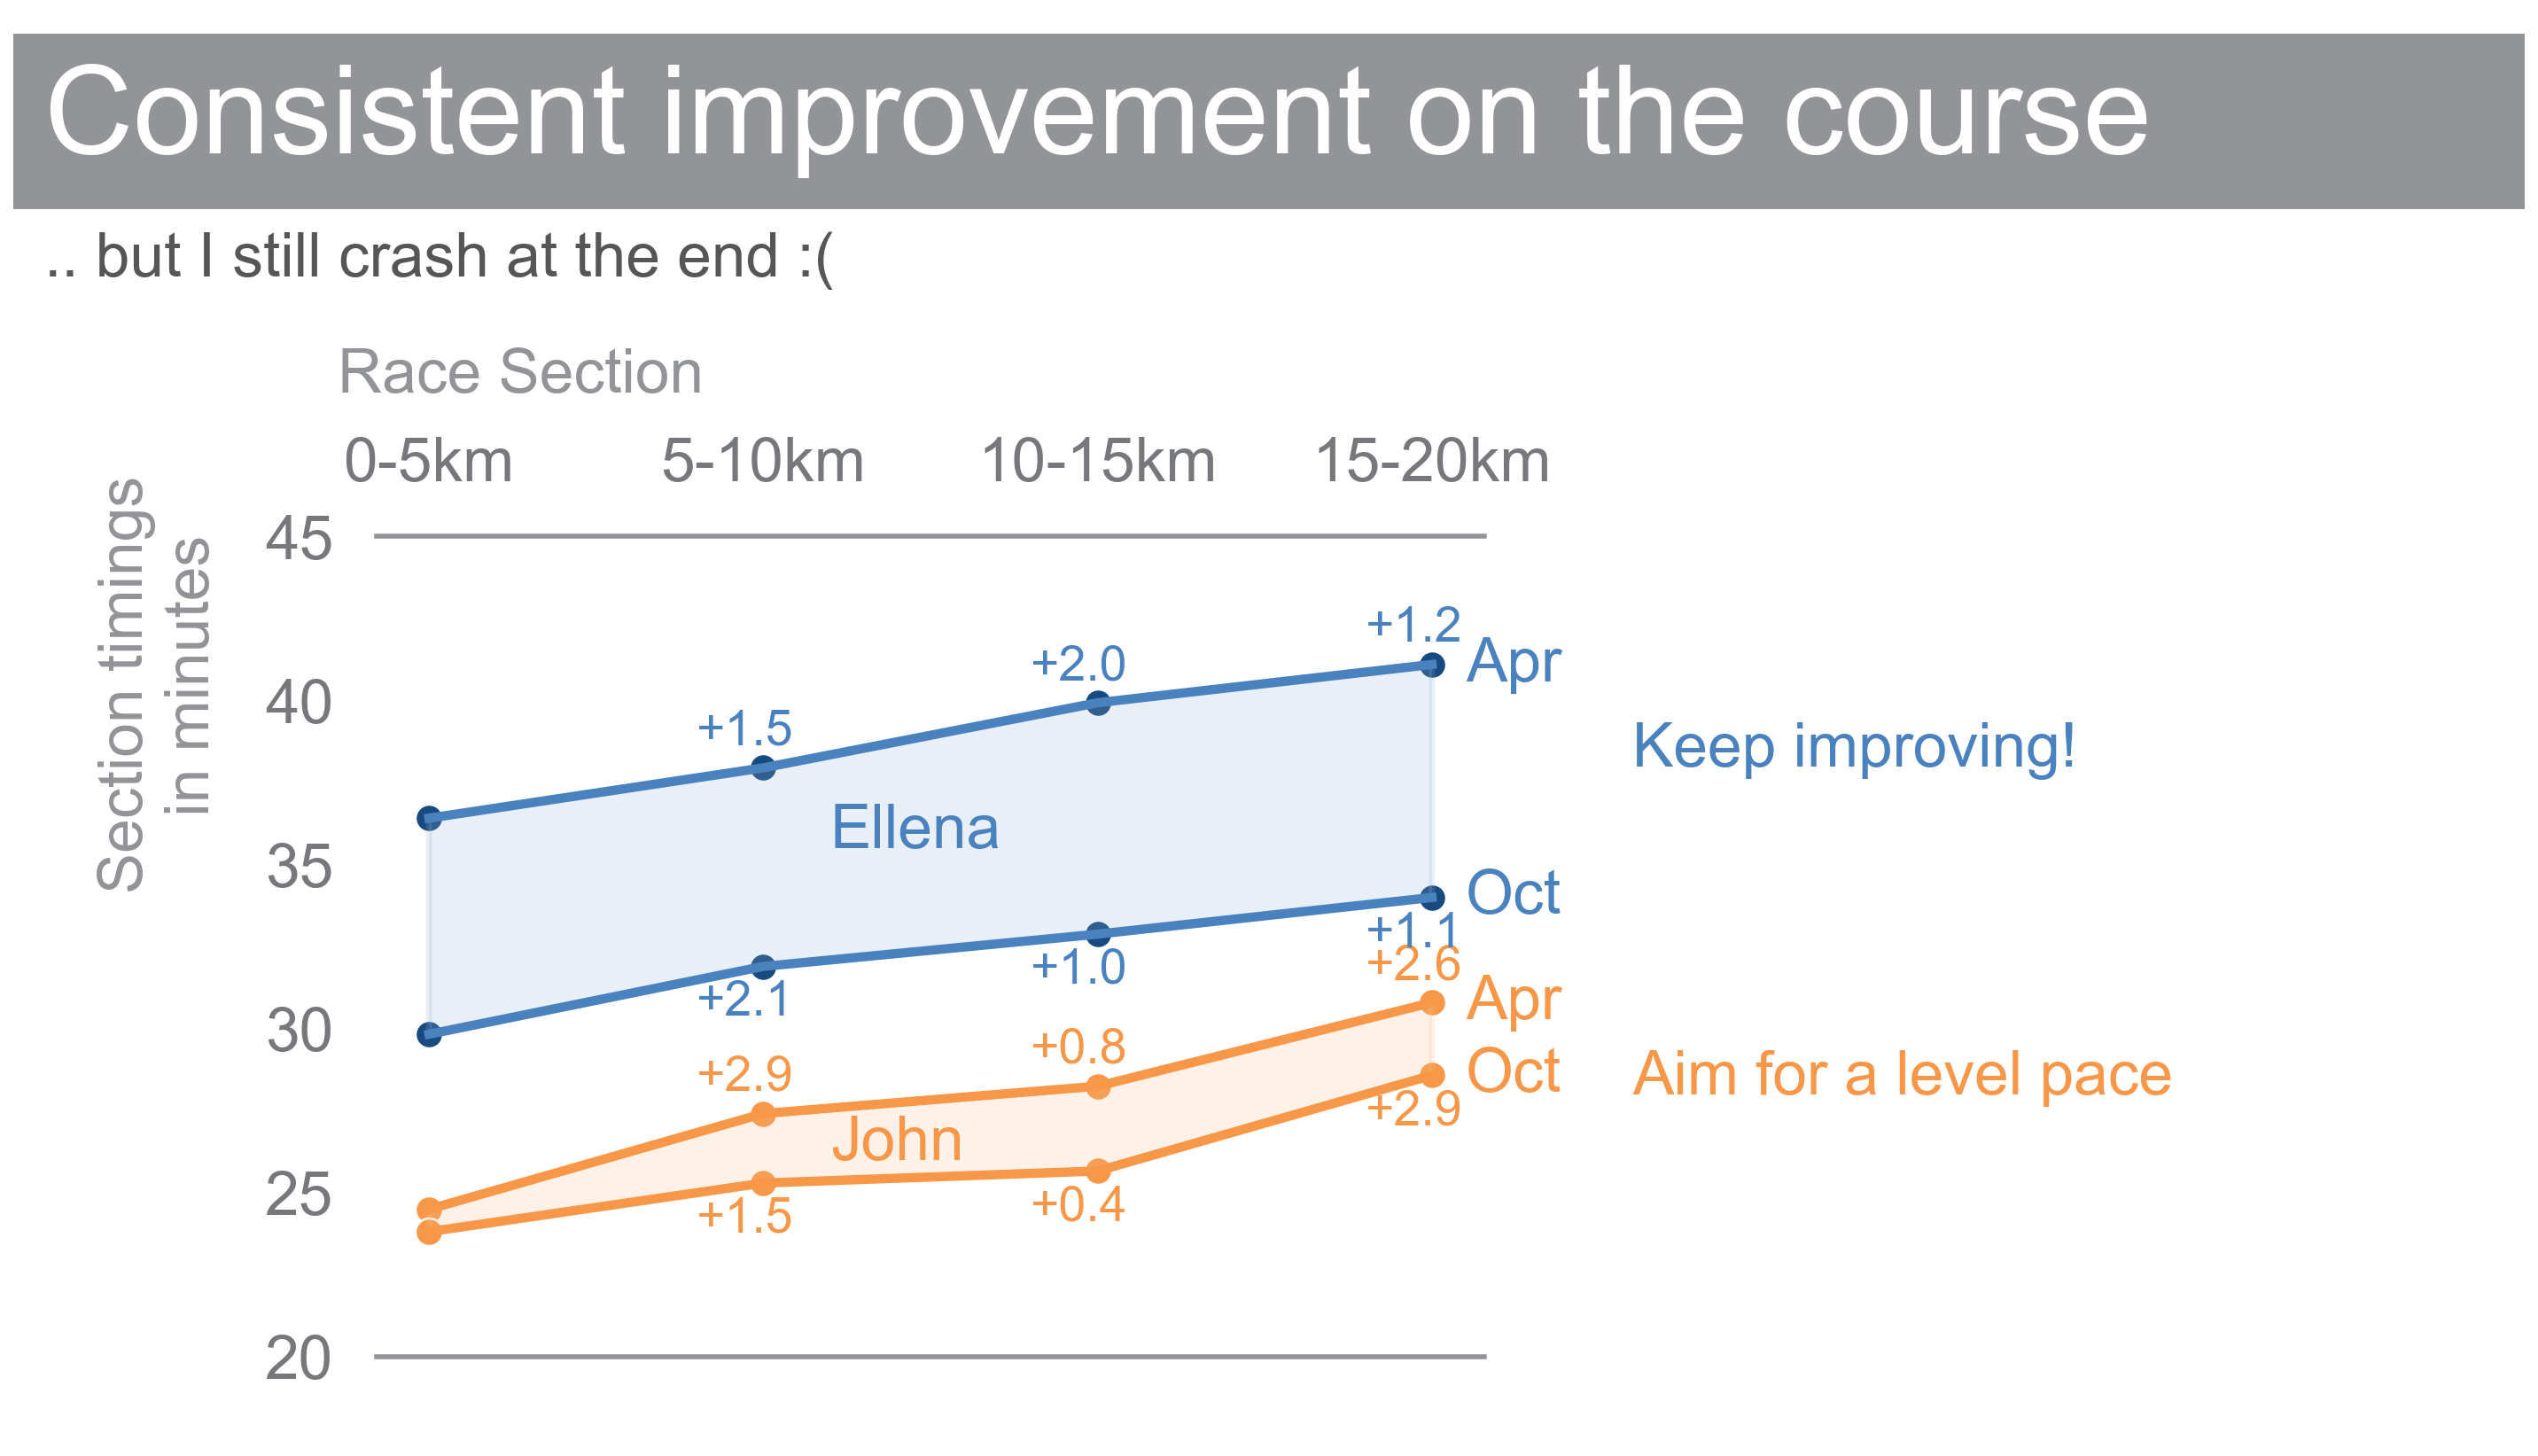

In [279]:

# create new figure
width = 5
fig = plt.figure(figsize=(width, width / 1.62), dpi=500)

ax0 = fig.add_axes( (0,0,1,1))
ax0.axis('Off') # don't draw anything.

# The title will force the left margin to get bigger
ax0.text(0.00, 0.92,
         'Consistent improvement on the course' + ' ' * 10,
         fontsize=20,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 5,  # add more padding
               'edgecolor': 'none'})  # no border

# The title will force the left margin to get bigger
ax0.text(0, 0.83,
         '.. but I still crash at the end :(' ,
         fontsize=10,
         color=GRAY3)


ax1 = fig.add_axes((0.15, 0.04, 0.5, 0.6))
#ax2 = ax1.twinx()

ax1.set_ylim([20, 45])


# remove chart border
for spine in ax1.spines.values():
    spine.set_visible(False)


#-------------------------------------------------
# Plot lines and put points on them 
lst_colours = [ORANGE1, BLUE2, ORANGE1, BLUE2]

g = sns.lineplot ( data = df, 
             x= "SECTION", 
              y="time_mins",
              hue= 'Hue',
              palette = lst_colours, 
              legend = False
                 )

sns.scatterplot(x=poly_points_John.values.transpose() [0] \
                , y=poly_points_John.values.transpose() [1], color=ORANGE1, s=20, ax=ax1)

sns.scatterplot(x=poly_points_Ellena.values.transpose() [0] \
                , y=poly_points_Ellena.values.transpose() [1], color=BLUE1, s=20, ax=ax1)

# Put labels at the end of the lines
for i in  list ( df.loc [ df.SECTION_NO == 3,   ].index ):
    colour = ORANGE1
    if df.loc[i, 'Label'] == "Ellena":
        colour = BLUE2
    
    # addleft  label(times)
    plt.text(3.1,
             df.loc[i, 'time_mins'] -0.5 ,
             df.loc[i, 'Month'],
             fontsize=10,
             linespacing=1.5,
             color= colour )
    

# Put minutes plus labels above or below points
for i in  list ( df.loc [ df.SECTION_NO != 0,   ].index ):

    y_adj = 0.8
    if df.loc[i, 'Month'] == "Oct":
        y_adj = y_adj * -1 - 0.7
    else:
        y_adj = 0.7
    
    colour = ORANGE1
    if df.loc[i, 'Label'] == "Ellena":
        colour = BLUE2    
        
    plt.text(  df.loc[i, 'SECTION_NO'] - 0.2 ,
             df.loc[i, 'time_mins'] + y_adj,
             '+{0:.1f}'.format ( df.loc[i, 'section_increase'] ),
             fontsize=8,
             linespacing=1.5,
             color= colour )
    
    
#-------------------------------------------------
# Naming labels
    
    # addleft  label(times)
plt.text(1.2,
             35.5 ,
             'Ellena',
             fontsize=10,
             linespacing=1.5,
             color= BLUE2 )


plt.text(1.2,
             26 ,
             'John',
             fontsize=10,
             linespacing=1.5,
             color= ORANGE1 )

#-------------------------------------------------
# Polygons
#-------------------------------------------------


poly_John = Polygon( poly_points_John, closed=True, alpha=0.2, color=ORANGE2)
poly_Ellena = Polygon( poly_points_Ellena, closed=True, alpha=0.2, color=BLUE3)

#polygon.set_color( [1,0,1])
collection = PatchCollection([poly_John,poly_Ellena] , match_original=True ) 
ax1.add_collection(collection)

#-------------------------------------------------
# Right hand side notes

#-------------------------------------------------    

plt.text(3.6 ,
             38 ,
             'Keep improving!',
             fontsize=10,
             linespacing=1.5,
             color= BLUE2 )


plt.text( 3.6,
             28 ,
             'Aim for a level pace',
             fontsize=10,
             linespacing=1.5,
             color= ORANGE1 )

#-------------------------------------------------
# Label annotations
#-------------------------------------------------




ax1.spines['top'].set_visible(True)
ax1.spines['top'].set_color(GRAY7)     

ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_color(GRAY7)     

# Sort out the axis ticks

ax1.tick_params (axis='x', width=0 ,labelsize=10, colors=GRAY7, labeltop=True, labelbottom=False,  labelcolor=GRAY5)
#ax1.tick_params (axis='y', width=0 ,labelsize=0, colors=GRAY7, labeltop=False, labelcolor=GRAY5)

ax1.tick_params (axis='y', width=0 ,labelsize=10, colors=GRAY7, labelcolor=GRAY5)

# Y axis label
ax1.yaxis.set_label_coords(-0.14, 0.82)
plt.ylabel('Section timings\n in minutes',fontsize=10,color =GRAY7)

# X axis label
ax1.xaxis.set_label_coords(0.13, 1.23)
plt.xlabel('Race Section',fontsize=10,color =GRAY7)

fig.savefig ( '..\Plots\Chart2')
